# MIT-GSL Uruguay 

## January 2020

-----

# Lesson - 1: Introduction to ML

** The first set of hands-on sessions are meant to provide a general overview of ML with the following topcs: **
1. Data import and export
2. Data pre-processing
3. Text pre-processing
4. Feature engineering
5. Cross-validation
5. High-dimensional modeling
6. Dimension reduction
6. Classification models:
    1. Logistic regression
    2. Regularized regression
    3. SVM
    4. Random Forests
    5. Boosted Trees
7. Model evaluation
8. Ensembling

** The class is desgined to be interactive. All the code and required data are provided. **

-----

Kaggle StumbleUpon Competition
==================
https://www.kaggle.com/c/stumbleupon

** About StumbleUpon **: User-curated web content discovery engine that recommends relevant, high quality pages and media to its users, based on their interests.

** Competition **: 
1. Some pages, such as news articles or seasonal recipes, are only relevant for a short period of time, others maintain a timeless quality and can be recommended to users long after they are discovered. 
2. Goal is to identify pages which are ephemeral and which are evergreen

** Objective **: Build classifier(s) to categorize webpages as evergreen (1) or non-evergreen (0)

** Evaluation **: Area under the curve (AUC)

** Data **: 
* Tab-separated file containing meta-data, webpage text (boilerplate), evergreen classification (target)
* Text based: high-dimensional
* Small sample size: prone to overfitting, high variance in results
    
** Notes **:
* We are only using the *train* data from the competition
* We will create our own split of training-val-test data
 


-----

Import Python Modules 
=================

In [50]:
# ==============================================
# 0. Module imports
# ==============================================

# data manipulation
import pandas as pd
import numpy as np
import scipy.stats as st

# plots
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import pylab as pl

# classification algorithms
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier

# dimension reduction
from sklearn.decomposition import PCA

# cross-validation
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn import model_selection

# parallel processing
from joblib import Parallel, delayed  
import multiprocessing

# model evaluation
from sklearn.metrics import roc_auc_score
from sklearn.ensemble.partial_dependence import plot_partial_dependence
from sklearn.ensemble.partial_dependence import partial_dependence

# text mining
import re
from nltk import PorterStemmer
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer

import warnings
warnings.filterwarnings("ignore")

In [51]:
# ==============================================
# Working directory
# ==============================================

import os
os.chdir(os.path.join("..", "data"))
print(os.getcwd())

/home/rmsander/Documents/GSL/machine_learning_aws/data


# 1. Data Import and Explore

In [52]:
# ==============================================
# 1. Data import and explore
# ==============================================

# import
train = pd.read_table("stumbleupon/train.tsv", sep= "\t")


In [53]:
print("Data dimensions:" + str(train.shape))
display(train.head(10))

Data dimensions:(7395, 27)


,url,urlid,boilerplate,alchemy_category,alchemy_category_score,avglinksize,commonlinkratio_1,commonlinkratio_2,commonlinkratio_3,commonlinkratio_4,...,is_news,lengthyLinkDomain,linkwordscore,news_front_page,non_markup_alphanum_characters,numberOfLinks,numwords_in_url,parametrizedLinkRatio,spelling_errors_ratio,label
0,http://www.bloomberg.com/news/2010-12-23/ibm-p...,4042,"{""title"":""IBM Sees Holographic Calls Air Breat...",business,0.789131,2.055556,0.676471,0.205882,0.047059,0.023529,...,1,1,24,0,5424,170,8,0.152941,0.079130,0
1,http://www.popsci.com/technology/article/2012-...,8471,"{""title"":""The Fully Electronic Futuristic Star...",recreation,0.574147,3.677966,0.508021,0.288770,0.213904,0.144385,...,1,1,40,0,4973,187,9,0.181818,0.125448,1
2,http://www.menshealth.com/health/flu-fighting-...,1164,"{""title"":""Fruits that Fight the Flu fruits tha...",health,0.996526,2.382883,0.562016,0.321705,0.120155,0.042636,...,1,1,55,0,2240,258,11,0.166667,0.057613,1
3,http://www.dumblittleman.com/2007/12/10-foolpr...,6684,"{""title"":""10 Foolproof Tips for Better Sleep ""...",health,0.801248,1.543103,0.400000,0.100000,0.016667,0.000000,...,1,0,24,0,2737,120,5,0.041667,0.100858,1
4,http://bleacherreport.com/articles/1205138-the...,9006,"{""title"":""The 50 Coolest Jerseys You Didn t Kn...",sports,0.719157,2.676471,0.500000,0.222222,0.123457,0.043210,...,1,1,14,0,12032,162,10,0.098765,0.082569,0
5,http://www.conveniencemedical.com/genital-herp...,7018,"{""url"":""conveniencemedical genital herpes home...",?,?,119.000000,0.745455,0.581818,0.290909,0.018182,...,?,0,12,?,4368,55,3,0.054545,0.087356,0
6,http://gofashionlane.blogspot.tw/2012/06/ameri...,8685,"{""title"":""fashion lane American Wild Child "",""...",arts_entertainment,0.22111,0.773810,0.215054,0.053763,0.043011,0.043011,...,1,0,21,0,1287,93,3,0.548387,0.064327,1
7,http://www.insidershealth.com/article/racing_f...,3402,"{""url"":""insidershealth article racing for reco...",?,?,1.883333,0.719697,0.265152,0.113636,0.015152,...,?,0,5,?,27656,132,4,0.068182,0.148551,0
8,http://www.valetmag.com/the-handbook/features/...,477,"{""title"":""Valet The Handbook 31 Days 31 days"",...",?,?,0.471503,0.190722,0.036082,0.000000,0.000000,...,1,0,17,0,2471,194,7,0.644330,0.125000,1
9,http://www.howsweeteats.com/2010/03/24/cookies...,6731,"{""url"":""howsweeteats 2010 03 24 cookies and cr...",?,?,2.410112,0.469325,0.101227,0.018405,0.003067,...,?,1,14,?,11459,326,4,0.236196,0.094412,1


## Variable descriptions:

1. **url**: Url of the webpage to be classified
2. **urlid**: StumbleUpon's unique identifier for each url
3. **boilerplate**: Boilerplate text
4. **alchemy_category**:	Alchemy category
5. **alchemy_category_score**:	Alchemy category score
6. **avglinksize**:	Average number of words in each link
7. **commonLinkRatio_1**:	# of links sharing at least 1 word with 1 other links / # of links
8. **commonLinkRatio_2**:	# of links sharing at least 1 word with 2 other links / # of links
9. **commonLinkRatio_3**:	# of links sharing at least 1 word with 3 other links / # of links
10. **commonLinkRatio_4**:	# of links sharing at least 1 word with 4 other links / # of links
11. **compression_ratio**:	Compression achieved on this page via gzip (measure of redundancy)
12. **embed_ratio**: Count of number of "embed" usage
13. **frameBased**: A page is frame-based (1) if it has no body markup but have a frameset markup
14. **frameTagRatio**: Ratio of iframe markups over total number of markups
15. **hasDomainLink**:	True (1) if it contains an "a" with an url with domain
16. **html_ratio**:	Ratio of tags vs text in the page
17. **image_ratio**: Ratio of "img" tags vs text in the page
18. **is_news**: True (1) if StumbleUpon's news classifier determines that this webpage is news
19. **lengthyLinkDomain**: True (1) if at least 3 "a"'s text contains more than 30 alphanumeric characters
20. **linkwordscore**: Percentage of words on the page that are in hyperlink's text
21. **news_front_page**: True (1) if StumbleUpon's news classifier determines that this webpage is front-page news
22. **non_markup_alphanum_characters**:	integer	Page's text's number of alphanumeric characters
23. **numberOfLinks**: Number of "a"  markups
24. **numwords_in_url**: Number of words in url
25. **parametrizedLinkRatio**: A link is parametrized if it's url contains parameters  or has an attached onClick event
26. **spelling_errors_ratio**: Ratio of words not found in wiki (considered to be a spelling mistake)
27. **label**: User-determined label. Either evergreen (1) or non-evergreen (0)


## Visualize and Describe Data

In [54]:
# data summary
train.describe()

,urlid,avglinksize,commonlinkratio_1,commonlinkratio_2,commonlinkratio_3,commonlinkratio_4,compression_ratio,embed_ratio,framebased,frameTagRatio,...,html_ratio,image_ratio,lengthyLinkDomain,linkwordscore,non_markup_alphanum_characters,numberOfLinks,numwords_in_url,parametrizedLinkRatio,spelling_errors_ratio,label
count,7395.000000,7395.000000,7395.000000,7395.000000,7395.000000,7395.000000,7395.000000,7395.000000,7395.0,7395.000000,...,7395.000000,7395.000000,7395.000000,7395.000000,7395.000000,7395.000000,7395.000000,7395.000000,7395.000000,7395.000000
mean,5305.704665,2.761823,0.468230,0.214080,0.092062,0.049262,2.255103,-0.103750,0.0,0.056423,...,0.233778,0.275709,0.660311,30.077079,5716.598242,178.754564,4.960649,0.172864,0.101221,0.513320
std,3048.384114,8.619793,0.203133,0.146743,0.095978,0.072629,5.704313,0.306545,0.0,0.041446,...,0.052487,1.919320,0.473636,20.393101,8875.432430,179.466198,3.233111,0.183286,0.079231,0.499856
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,0.0,0.000000,...,0.045564,-1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,2688.500000,1.602062,0.340370,0.105263,0.022222,0.000000,0.442616,0.000000,0.0,0.028502,...,0.201061,0.025900,0.000000,14.000000,1579.000000,82.000000,3.000000,0.040984,0.068739,0.000000
50%,5304.000000,2.088235,0.481481,0.202454,0.068627,0.022222,0.483680,0.000000,0.0,0.045775,...,0.230564,0.083051,1.000000,25.000000,3500.000000,139.000000,5.000000,0.113402,0.089312,1.000000
75%,7946.500000,2.627451,0.616604,0.300000,0.133333,0.065065,0.578227,0.000000,0.0,0.073459,...,0.260770,0.236700,1.000000,43.000000,6377.000000,222.000000,7.000000,0.241299,0.112376,1.000000
max,10566.000000,363.000000,1.000000,1.000000,0.980392,0.980392,21.000000,0.250000,0.0,0.444444,...,0.716883,113.333333,1.000000,100.000000,207952.000000,4997.000000,22.000000,1.000000,1.000000,1.000000


In [55]:
# target variable
train["label"].value_counts()

1    3796
0    3599
Name: label, dtype: int64

In [56]:
# set "?" as missing values
train = train.replace("?", np.nan)
train.head(100)

,url,urlid,boilerplate,alchemy_category,alchemy_category_score,avglinksize,commonlinkratio_1,commonlinkratio_2,commonlinkratio_3,commonlinkratio_4,...,is_news,lengthyLinkDomain,linkwordscore,news_front_page,non_markup_alphanum_characters,numberOfLinks,numwords_in_url,parametrizedLinkRatio,spelling_errors_ratio,label
0,http://www.bloomberg.com/news/2010-12-23/ibm-p...,4042,"{""title"":""IBM Sees Holographic Calls Air Breat...",business,0.789131,2.055556,0.676471,0.205882,0.047059,0.023529,...,1,1,24,0,5424,170,8,0.152941,0.079130,0
1,http://www.popsci.com/technology/article/2012-...,8471,"{""title"":""The Fully Electronic Futuristic Star...",recreation,0.574147,3.677966,0.508021,0.288770,0.213904,0.144385,...,1,1,40,0,4973,187,9,0.181818,0.125448,1
2,http://www.menshealth.com/health/flu-fighting-...,1164,"{""title"":""Fruits that Fight the Flu fruits tha...",health,0.996526,2.382883,0.562016,0.321705,0.120155,0.042636,...,1,1,55,0,2240,258,11,0.166667,0.057613,1
3,http://www.dumblittleman.com/2007/12/10-foolpr...,6684,"{""title"":""10 Foolproof Tips for Better Sleep ""...",health,0.801248,1.543103,0.400000,0.100000,0.016667,0.000000,...,1,0,24,0,2737,120,5,0.041667,0.100858,1
4,http://bleacherreport.com/articles/1205138-the...,9006,"{""title"":""The 50 Coolest Jerseys You Didn t Kn...",sports,0.719157,2.676471,0.500000,0.222222,0.123457,0.043210,...,1,1,14,0,12032,162,10,0.098765,0.082569,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,http://www.bbc.co.uk/food/recipes/salted_caram...,6167,"{""title"":""BBC Food Recipes Salted caramel mill...",culture_politics,0.449769,2.516854,0.447917,0.156250,0.083333,0.010417,...,NaN,1,33,0,2100,96,4,0.062500,0.033333,1
96,http://www.crunchgear.com/2010/01/22/boogie-bo...,3738,"{""title"":""Boogie Board writing tablet costs 30...",NaN,NaN,3.596774,0.384615,0.107692,0.092308,0.061538,...,NaN,1,7,NaN,13636,65,8,0.092308,0.089005,0
97,http://laughitup.info/?p=165,9791,"{""title"":""Underage Drinkers "",""body"":"" "",""url""...",recreation,0.0784091,1.545455,0.345455,0.163636,0.000000,0.000000,...,1,0,45,1,456,55,0,0.836364,0.250000,0
98,http://www.notcot.com/archives/2007/04/freebas...,2180,"{""title"":""Freebase Pancakes NOTCOT "",""body"":""n...",NaN,NaN,1.110132,0.867684,0.197201,0.077608,0.068702,...,NaN,0,51,NaN,2780,786,3,0.000000,0.120000,1


In [57]:
# variable types
train.dtypes

url                                object
urlid                               int64
boilerplate                        object
alchemy_category                   object
alchemy_category_score             object
avglinksize                       float64
commonlinkratio_1                 float64
commonlinkratio_2                 float64
commonlinkratio_3                 float64
commonlinkratio_4                 float64
compression_ratio                 float64
embed_ratio                       float64
framebased                          int64
frameTagRatio                     float64
hasDomainLink                       int64
html_ratio                        float64
image_ratio                       float64
is_news                            object
lengthyLinkDomain                   int64
linkwordscore                       int64
news_front_page                    object
non_markup_alphanum_characters      int64
numberOfLinks                       int64
numwords_in_url                   

** Note **: Scikit-learn training algorithms do not accept categorical features and hence they need to be converted to numeric or binary before fitting the model 

In [58]:
# Fix variable types
# Some numeric variables are stored as string and can be directly converted
train[["alchemy_category_score", "is_news", "news_front_page"]] = train[["alchemy_category_score",
                                                                         "is_news", "news_front_page"]].astype(float)

train.dtypes

url                                object
urlid                               int64
boilerplate                        object
alchemy_category                   object
alchemy_category_score            float64
avglinksize                       float64
commonlinkratio_1                 float64
commonlinkratio_2                 float64
commonlinkratio_3                 float64
commonlinkratio_4                 float64
compression_ratio                 float64
embed_ratio                       float64
framebased                          int64
frameTagRatio                     float64
hasDomainLink                       int64
html_ratio                        float64
image_ratio                       float64
is_news                           float64
lengthyLinkDomain                   int64
linkwordscore                       int64
news_front_page                   float64
non_markup_alphanum_characters      int64
numberOfLinks                       int64
numwords_in_url                   

---

# 2. Understanding Variables and Visualization

In [59]:
# ==============================================
# 2. Understanding variables
# ==============================================

# =============================
# 2.1 alchemy_category
# =============================
print(train["alchemy_category"].value_counts())

# Frequency table
pd.crosstab(train["alchemy_category"],train["label"])

recreation            1229
arts_entertainment     941
business               880
health                 506
sports                 380
culture_politics       343
computer_internet      296
science_technology     289
gaming                  76
religion                72
law_crime               31
unknown                  6
weather                  4
Name: alchemy_category, dtype: int64


label,0,1
alchemy_category,,
arts_entertainment,591,350
business,254,626
computer_internet,223,73
culture_politics,186,157
gaming,48,28
health,216,290
law_crime,18,13
recreation,388,841
religion,42,30


In [60]:
# percentages
pd.crosstab(train["alchemy_category"],train["label"]).apply(lambda x: np.round(x/x.sum(),2), axis=1)

label,0,1
alchemy_category,,
arts_entertainment,0.63,0.37
business,0.29,0.71
computer_internet,0.75,0.25
culture_politics,0.54,0.46
gaming,0.63,0.37
health,0.43,0.57
law_crime,0.58,0.42
recreation,0.32,0.68
religion,0.58,0.42


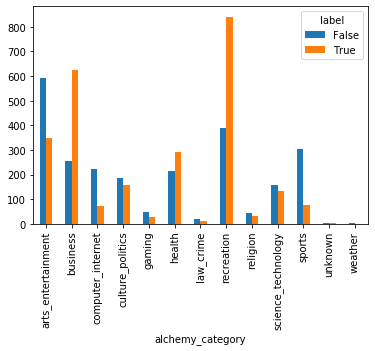

In [61]:
# plot
pd.crosstab(train.alchemy_category, train.label.astype(bool)).plot(kind="bar");

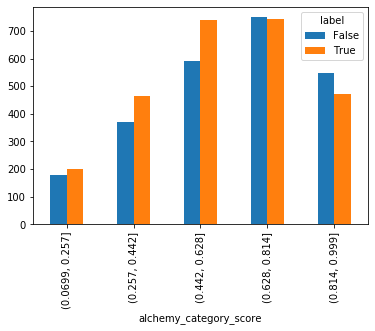

In [62]:
# =============================
# 2.2 alchemy_category_score
# =============================

# bin the continuous variable and check frequency within each bin
pd.crosstab(pd.cut(train["alchemy_category_score"], bins=5), train.label.astype(bool)).plot(kind="bar");

In [63]:
# =============================
# 2.3 avglinksize
# =============================

# bin the continuous variable and check frequency within each bin
pd.crosstab(pd.cut(train["avglinksize"], bins=5), train["label"].astype(bool))

label,False,True
avglinksize,,
"(-0.363, 72.6]",3593,3786
"(72.6, 145.2]",4,4
"(145.2, 217.8]",2,3
"(217.8, 290.4]",0,2
"(290.4, 363.0]",0,1


AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)


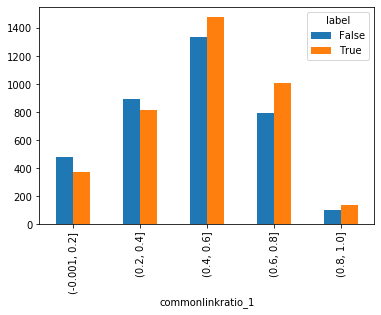

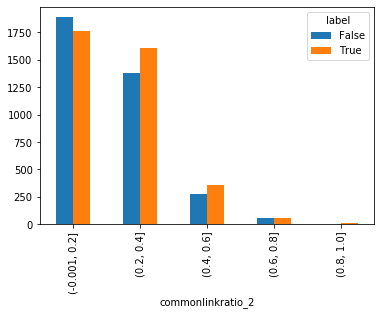

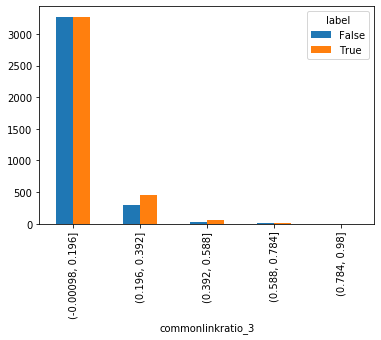

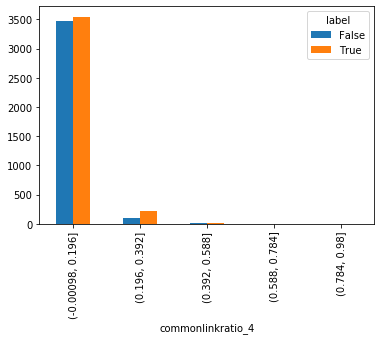

In [64]:
# =============================
# 2.4 commonlinkratio variables
# =============================

# bin the continuous variable and check frequency within each bin
print(pd.crosstab(pd.cut(train["commonlinkratio_1"], bins= 5), train.label.astype(bool)).plot(kind= "bar"));
print(pd.crosstab(pd.cut(train["commonlinkratio_2"], bins= 5), train.label.astype(bool)).plot(kind= "bar"));
print(pd.crosstab(pd.cut(train["commonlinkratio_3"], bins= 5), train.label.astype(bool)).plot(kind= "bar"));
print(pd.crosstab(pd.cut(train["commonlinkratio_4"], bins= 5), train.label.astype(bool)).plot(kind= "bar"));

In [65]:
# =============================
# 2.5 compression_ratio
# =============================

# bin the continuous variable and check frequency within each bin
pd.crosstab(pd.cut(train["compression_ratio"], bins= 5), train.label.astype(bool))

label,False,True
compression_ratio,,
"(-0.021, 4.2]",3232,3530
"(4.2, 8.4]",1,0
"(8.4, 12.6]",4,4
"(16.8, 21.0]",362,262


AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)


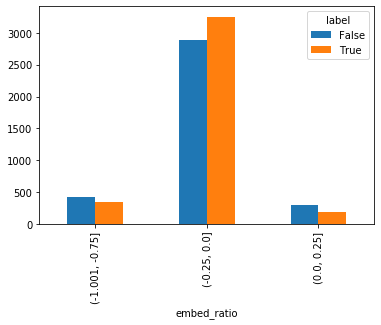

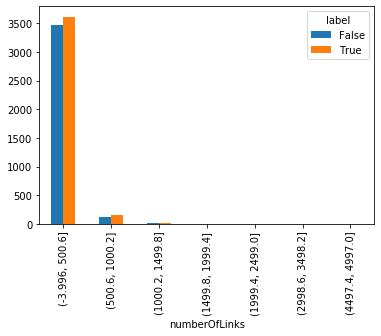

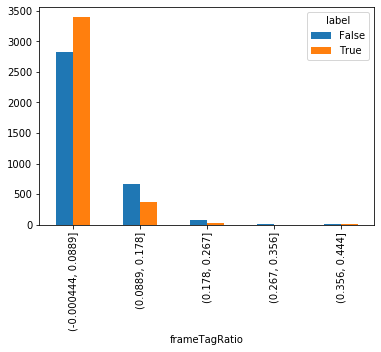

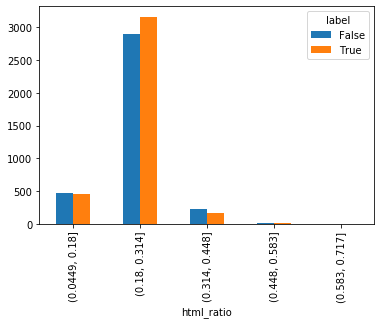

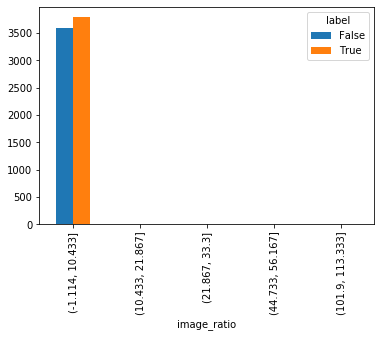

In [66]:
# =============================
# 2.6 Other continuous variables
# =============================

print(pd.crosstab(pd.cut(train["embed_ratio"], bins= 5), train.label.astype(bool)).plot(kind= "bar"))
print(pd.crosstab(pd.cut(train["numberOfLinks"],bins=10), train.label.astype(bool)).plot(kind= "bar"))
print(pd.crosstab(pd.cut(train["frameTagRatio"], bins= 5), train.label.astype(bool)).plot(kind= "bar"))
print(pd.crosstab(pd.cut(train["html_ratio"], bins= 5), train.label.astype(bool)).plot(kind= "bar"))
print(pd.crosstab(pd.cut(train["image_ratio"], bins= 10), train.label.astype(bool)).plot(kind= "bar"))

-----

# Class Exercise 1

### Make plots for the following continuous variables
1. lengthyLinkDomain
2. linkwordscore
3. non_markup_alphanum_characters
4. numberOfLinks
5. numwords_in_url
6. parametrizedLinkRatio
7. spelling_errors_ratio

** Note **: You may need to set the number of bins appropriately for each variable

In [67]:
#TODO: STUDENTS FILL THIS IN



---

# 3. Data Splitting


In [68]:
# ==============================================
# 3. Prep for modeling
# ==============================================

# =============================
# Train-val-test split
# =============================

train, val = train_test_split(train, test_size= 0.5, train_size= 0.5, random_state= 234)
val, test = train_test_split(val, test_size= 0.5, train_size= 0.5, random_state= 675)
print("Train data size: " + str(train.shape))
print("Validation data size: " + str(val.shape))
print("Test data size: " + str(test.shape))

Train data size: (3697, 27)
Validation data size: (1849, 27)
Test data size: (1849, 27)


-----

## Check if the dependent variable has the same distribution in train, val, and test

In [69]:
print(train["label"].value_counts()/train.shape[0])

1    0.519881
0    0.480119
Name: label, dtype: float64


In [70]:
#print(val["label"].value_counts()/val.shape[0])

In [71]:
#print(test["label"].value_counts()/test.shape[0])

--------

# 4. Classification - Logistic Regression and Evaluation

In [72]:
# ==========================================
# 4. Modeling
# ==========================================

# =============================
# 4.1 Baseline model
#   Vanilla logistic regression
# =============================

# use only numeric variables without any missing values
feat = ["avglinksize", "commonlinkratio_1", "commonlinkratio_2", "commonlinkratio_3", "commonlinkratio_4", 
        "compression_ratio", "embed_ratio", "framebased", "frameTagRatio", "hasDomainLink", "html_ratio",
        "image_ratio", "lengthyLinkDomain", "linkwordscore", "non_markup_alphanum_characters", "numberOfLinks", 
        "numwords_in_url", "parametrizedLinkRatio","spelling_errors_ratio"]

# fit logistic regression
logReg1 = LogisticRegression(penalty = "l2", C = 100000)
logReg1.fit(train[feat], train["label"])

LogisticRegression(C=100000, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [73]:
# predict on validation data
log_preds = logReg1.predict_proba(val[feat])[:,1]  # Probability that model predicts label 1
logReg1_val = pd.Series(log_preds)
print(logReg1_val.describe())  # Summary statistics of probabilities across validation set
print(" -- -- -- ")

count    1849.000000
mean        0.516621
std         0.110075
min         0.091591
25%         0.455421
50%         0.538424
75%         0.589830
max         0.910725
dtype: float64
 -- -- -- 


In [74]:
# auc score
print("Baseline logistic performance: " + str(np.round(roc_auc_score(val["label"], logReg1_val.values), 5)))

Baseline logistic performance: 0.64532


---

## Evaluation Metrics

In [75]:
#EVAN TODO: PUT Evaluation stuff here

# 5. Feature Engineering

In [76]:
# ==========================================
# 5. Feature engineering
# ==========================================

# =============================
# 5.1 Variables with missing 
#     values
# =============================

# find variables with missing values
print(np.sum(train.isnull()))

url                                  0
urlid                                0
boilerplate                          0
alchemy_category                  1184
alchemy_category_score            1184
avglinksize                          0
commonlinkratio_1                    0
commonlinkratio_2                    0
commonlinkratio_3                    0
commonlinkratio_4                    0
compression_ratio                    0
embed_ratio                          0
framebased                           0
frameTagRatio                        0
hasDomainLink                        0
html_ratio                           0
image_ratio                          0
is_news                           1419
lengthyLinkDomain                    0
linkwordscore                        0
news_front_page                    594
non_markup_alphanum_characters       0
numberOfLinks                        0
numwords_in_url                      0
parametrizedLinkRatio                0
spelling_errors_ratio    

In [77]:
# replace missing values with mean from training set
train["alchemy_category_score"] = train["alchemy_category_score"].fillna(np.mean(train["alchemy_category_score"]))
val["alchemy_category_score"] = val["alchemy_category_score"].fillna(np.mean(train["alchemy_category_score"]))
test["alchemy_category_score"] = test["alchemy_category_score"].fillna(np.mean(train["alchemy_category_score"]))

In [78]:
# is_news
print(train["is_news"].value_counts())

1.0    2278
Name: is_news, dtype: int64


In [79]:
train["is_news"] = train["is_news"].fillna(0)
pd.crosstab(train["is_news"],train["label"]).apply(lambda x: np.round(x/x.sum(),2), axis=1)

label,0,1
is_news,,
0.0,0.50,0.50
1.0,0.47,0.53


In [80]:
# news_front_page
print(train["news_front_page"].value_counts())

0.0    2952
1.0     151
Name: news_front_page, dtype: int64


In [81]:
train["news_front_page"] = train["news_front_page"].fillna(2)
print(train["news_front_page"].value_counts())
pd.crosstab(train["news_front_page"],train["label"])#.apply(lambda x: np.round(x/x.sum(),2), axis=1)

0.0    2952
2.0     594
1.0     151
Name: news_front_page, dtype: int64


label,0,1
news_front_page,,
0.0,1403,1549
1.0,74,77
2.0,298,296


---

In [82]:
# =============================
# 4.2 Update baseline model
#   Vanilla logistic regression
# =============================

# use numeric variables with missing values imputed (for alchemy_categeory_score)
feat = ["avglinksize", "commonlinkratio_1", "commonlinkratio_2", "commonlinkratio_3", "commonlinkratio_4", 
        "compression_ratio", "embed_ratio", "framebased", "frameTagRatio", "hasDomainLink", "html_ratio",
        "image_ratio", "lengthyLinkDomain", "linkwordscore", "non_markup_alphanum_characters", "numberOfLinks", 
        "numwords_in_url", "parametrizedLinkRatio","spelling_errors_ratio", "alchemy_category_score"]

# fit logistic regression
logReg1 = LogisticRegression(penalty = "l2", C = 100000)
logReg1.fit(train[feat], train["label"])

# predict on validation data
logReg1_val = pd.Series(logReg1.predict_proba(val[feat])[:,1])
print(" -- -- -- ")

# auc score
print("Updated baseline logistic performance: " + str(np.round(roc_auc_score(val["label"], logReg1_val.values), 5)))

 -- -- -- 
Updated baseline logistic performance: 0.64829


---

In [83]:
# ==========================================
# 5. Feature engineering
# ==========================================


# =============================
# 5.2.1 Categorical variables
# =============================

# alchemy_category
print(train["alchemy_category"].value_counts())
print(" --- ")
print(np.sum(train["alchemy_category"].isnull()))


# impute missing values as separate category
train["alchemy_category"] = train["alchemy_category"].fillna("_M")
val["alchemy_category"] = val["alchemy_category"].fillna("_M")
test["alchemy_category"] = test["alchemy_category"].fillna("_M")

print(" --- ")
print(pd.crosstab(train["alchemy_category"],train["label"]).apply(lambda x: np.round(x/x.sum(), 2), axis=1))

recreation            602
arts_entertainment    471
business              465
health                264
sports                183
computer_internet     147
culture_politics      143
science_technology    138
religion               40
gaming                 32
law_crime              21
unknown                 4
weather                 3
Name: alchemy_category, dtype: int64
 --- 
1184
 --- 
label                  0     1
alchemy_category              
_M                  0.50  0.50
arts_entertainment  0.62  0.38
business            0.27  0.73
computer_internet   0.78  0.22
culture_politics    0.57  0.43
gaming              0.50  0.50
health              0.43  0.57
law_crime           0.67  0.33
recreation          0.31  0.69
religion            0.65  0.35
science_technology  0.51  0.49
sports              0.76  0.24
unknown             0.75  0.25
weather             1.00  0.00


### Use Pandas to Convert Categorical Data to Numerical Data for Logistic Regression

In [84]:
# dummy variables for all categories
alch_train = pd.get_dummies(train["alchemy_category"], prefix= "al_cat")
print("Train dummies: " + str(alch_train.shape))

alch_val = pd.get_dummies(val["alchemy_category"], prefix= "al_cat")
print("Val dummies: " + str(alch_val.shape))

alch_test = pd.get_dummies(test["alchemy_category"], prefix= "al_cat")
print("Test dummies: " + str(alch_test.shape))

Train dummies: (3697, 14)
Val dummies: (1849, 13)
Test dummies: (1849, 14)


In [85]:
print(list(alch_train.columns))
print(" --- ")
print(list(alch_val.columns))
print(" --- ")
print(list(alch_test.columns))

['al_cat__M', 'al_cat_arts_entertainment', 'al_cat_business', 'al_cat_computer_internet', 'al_cat_culture_politics', 'al_cat_gaming', 'al_cat_health', 'al_cat_law_crime', 'al_cat_recreation', 'al_cat_religion', 'al_cat_science_technology', 'al_cat_sports', 'al_cat_unknown', 'al_cat_weather']
 --- 
['al_cat__M', 'al_cat_arts_entertainment', 'al_cat_business', 'al_cat_computer_internet', 'al_cat_culture_politics', 'al_cat_gaming', 'al_cat_health', 'al_cat_law_crime', 'al_cat_recreation', 'al_cat_religion', 'al_cat_science_technology', 'al_cat_sports', 'al_cat_unknown']
 --- 
['al_cat__M', 'al_cat_arts_entertainment', 'al_cat_business', 'al_cat_computer_internet', 'al_cat_culture_politics', 'al_cat_gaming', 'al_cat_health', 'al_cat_law_crime', 'al_cat_recreation', 'al_cat_religion', 'al_cat_science_technology', 'al_cat_sports', 'al_cat_unknown', 'al_cat_weather']


### Merge Alchemy Data with Full Dataset

In [86]:
# join with main data using indices
print(set(list(train.index)) == set(list(alch_train.index)))
print(set(list(val.index)) == set(list(alch_val.index)))
print(set(list(test.index)) == set(list(alch_test.index)))

# join alchemy features with full datasets 
train = train.join(alch_train)
val = val.join(alch_val)
test= test.join(alch_test)

train.head(100)

True
True
True
Index(['url', 'urlid', 'boilerplate', 'alchemy_category',
       'alchemy_category_score', 'avglinksize', 'commonlinkratio_1',
       'commonlinkratio_2', 'commonlinkratio_3', 'commonlinkratio_4',
       'compression_ratio', 'embed_ratio', 'framebased', 'frameTagRatio',
       'hasDomainLink', 'html_ratio', 'image_ratio', 'is_news',
       'lengthyLinkDomain', 'linkwordscore', 'news_front_page',
       'non_markup_alphanum_characters', 'numberOfLinks', 'numwords_in_url',
       'parametrizedLinkRatio', 'spelling_errors_ratio', 'label', 'al_cat__M',
       'al_cat_arts_entertainment', 'al_cat_business',
       'al_cat_computer_internet', 'al_cat_culture_politics', 'al_cat_gaming',
       'al_cat_health', 'al_cat_law_crime', 'al_cat_recreation',
       'al_cat_religion', 'al_cat_science_technology', 'al_cat_sports',
       'al_cat_unknown'],
      dtype='object')


,url,urlid,boilerplate,alchemy_category,alchemy_category_score,avglinksize,commonlinkratio_1,commonlinkratio_2,commonlinkratio_3,commonlinkratio_4,...,al_cat_culture_politics,al_cat_gaming,al_cat_health,al_cat_law_crime,al_cat_recreation,al_cat_religion,al_cat_science_technology,al_cat_sports,al_cat_unknown,al_cat_weather
3897,http://bloggerspath.com/technology-world-news-...,8065,"{""title"":""Technology World s News Updates of A...",_M,0.602462,1.727273,0.243590,0.038462,0.012821,0.000000,...,0,0,0,0,0,0,0,0,0,0
2099,http://www.foodforhealthyhair.com/how-to-get-h...,9682,"{""title"":""How to Get Healthy Hair Ten Ways to ...",_M,0.602462,2.622222,0.760870,0.326087,0.152174,0.086957,...,0,0,0,0,0,0,0,0,0,0
3152,http://iwastesomuchtime.com/on?i=3051,6219,"{""title"":""OM NOM NOM om nom nom."",""body"":"" i w...",_M,0.602462,0.909091,0.121951,0.048780,0.000000,0.000000,...,0,0,0,0,0,0,0,0,0,0
7342,http://bleacherreport.com/articles/1179008-the...,8312,"{""title"":""The 50 Gnarliest Pictures in Sports ...",sports,0.392081,2.614583,0.483333,0.258333,0.141667,0.058333,...,0,0,0,0,0,0,0,1,0,0
1114,http://www.technologyreview.com/biomedicine/38...,10299,"{""title"":""Fingertip Microscope Can Peek Inside...",_M,0.602462,1.890625,0.292208,0.090909,0.019481,0.012987,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1518,http://www.choosingraw.com/you-ask-i-deliver-m...,3654,"{""title"":""My Top Ten Favorite Juice Recipes "",...",recreation,0.344145,2.225806,0.634660,0.276347,0.238876,0.220141,...,0,0,0,0,1,0,0,0,0,0
2324,http://www.poorgirleatswell.com/2009/10/recipe...,5574,"{""title"":""Recipe Hearty Mushroom Potato Soup ""...",recreation,0.747449,1.845815,0.676856,0.310044,0.183406,0.148472,...,0,0,0,0,1,0,0,0,0,0
3843,http://m.lifehacker.com/5860015/cook-pasta-wit...,7617,"{""url"":""m lifehacker 5860015 cook pasta with c...",_M,0.602462,1.320755,0.187500,0.075000,0.012500,0.000000,...,0,0,0,0,0,0,0,0,0,0
535,http://www.fitsugar.com/3-Ways-Improve-Bad-Pos...,8523,"{""title"":""3 Ways to Improve Bad Posture stop s...",health,0.285445,2.235602,0.435000,0.125000,0.055000,0.020000,...,0,0,1,0,0,0,0,0,0,0


In [37]:
list(train.columns)

['url',
 'urlid',
 'boilerplate',
 'alchemy_category',
 'alchemy_category_score',
 'avglinksize',
 'commonlinkratio_1',
 'commonlinkratio_2',
 'commonlinkratio_3',
 'commonlinkratio_4',
 'compression_ratio',
 'embed_ratio',
 'framebased',
 'frameTagRatio',
 'hasDomainLink',
 'html_ratio',
 'image_ratio',
 'is_news',
 'lengthyLinkDomain',
 'linkwordscore',
 'news_front_page',
 'non_markup_alphanum_characters',
 'numberOfLinks',
 'numwords_in_url',
 'parametrizedLinkRatio',
 'spelling_errors_ratio',
 'label',
 'al_cat__M',
 'al_cat_arts_entertainment',
 'al_cat_business',
 'al_cat_computer_internet',
 'al_cat_culture_politics',
 'al_cat_gaming',
 'al_cat_health',
 'al_cat_law_crime',
 'al_cat_recreation',
 'al_cat_religion',
 'al_cat_science_technology',
 'al_cat_sports',
 'al_cat_unknown',
 'al_cat_weather']

---

In [38]:
# =============================
# 4.3 Update baseline model
#   Vanilla logistic regression
# =============================

# use numeric variables with missing values imputed
feat = ["avglinksize", "commonlinkratio_1", "commonlinkratio_2", "commonlinkratio_3", "commonlinkratio_4", 
        "compression_ratio", "embed_ratio", "framebased", "frameTagRatio", "hasDomainLink", "html_ratio",
        "image_ratio", "lengthyLinkDomain", "linkwordscore", "non_markup_alphanum_characters", "numberOfLinks", 
        "numwords_in_url", "parametrizedLinkRatio","spelling_errors_ratio", "alchemy_category_score", 
        "al_cat__M", "al_cat_arts_entertainment", "al_cat_business", "al_cat_computer_internet",
        "al_cat_culture_politics", "al_cat_gaming", "al_cat_health", "al_cat_law_crime", "al_cat_recreation",
        "al_cat_religion", "al_cat_science_technology", "al_cat_sports"]

# fit logistic regression
logReg1 = LogisticRegression(penalty = "l2", C = 100000)
logReg1.fit(train[feat], train["label"])

# predict on validation data
logReg1_val = pd.Series(logReg1.predict_proba(val[feat])[:,1])
print(" -- -- -- ")

# auc score
print("Updated baseline logistic performance: " + str(np.round(roc_auc_score(val["label"], logReg1_val.values), 5)))

 -- -- -- 
Updated baseline logistic performance: 0.69367


---

### Cross-Validation 

In [39]:
# ==========================================
# 5. Feature engineering
# ==========================================


# =============================
# 5.2.2 Categorical variables
# =============================

# Function to create k cross validation folds
def createFolds(df, nfolds):
    rows = df.shape[0]
    folds = list(range(0, nfolds))*int(np.ceil(float(rows)/nfolds))
    folds = folds[0:rows]
    np.random.shuffle(folds)
    folds = pd.Series(folds)
    return folds


# cross-fold category average
def cat_avg_cv(df, target, var, var_out, idcol, nfolds= 4, r1= 0.6, r2= 0.4):
    df = df[[idcol, target, var]]
    df_out = pd.DataFrame({idcol:[], var_out: []})
    folds = createFolds(df= df, nfolds= nfolds)
    for f in range(0, nfolds):
        print("Fold", f+1, "of", nfolds)
        tr = df.loc[folds.values == f, [idcol, var]]
        va = df.loc[folds.values != f, [var, target]]
        fold_mean = va[target].mean()
        va = va.groupby(var).agg({target: np.mean})
        va = pd.DataFrame({var: va.index, var_out: va[target]})
        va[var_out] = r1*va[var_out] + r2*fold_mean
        tr = pd.merge(tr, va, on= var, how= "left")
        tr = tr[[idcol, var_out]]
        df_out = df_out.append(tr)
    df_out = df_out.fillna(df[target].mean())
    return df_out


# for training data
alch_cat_cv = cat_avg_cv(train, "label", "alchemy_category", "alch_avg", 
                         idcol= "urlid", nfolds= 4, r1= 1.0, r2= 0.0)
print(alch_cat_cv.head(10))



Fold 1 of 4
Fold 2 of 4
Fold 3 of 4
Fold 4 of 4
   alch_avg   urlid
0  0.504940  6219.0
1  0.570707  3041.0
2  0.393617  2285.0
3  0.509434  7842.0
4  0.504940  3508.0
5  0.504940  5161.0
6  0.684902  4144.0
7  0.570707  5577.0
8  0.504940  9585.0
9  0.226415   612.0


In [40]:
# use direct means for validation and testing data
alch_avg = train.groupby("alchemy_category").label.mean()
alch_avg = pd.DataFrame({"alchemy_category": alch_avg.index,
                         "alch_avg": alch_avg.values})
print(alch_avg)

# merge with train and val
train = pd.merge(train, alch_cat_cv, on= "urlid", how= "left")
val = pd.merge(val, alch_avg, on= "alchemy_category", how= "left")
test = pd.merge(test, alch_avg, on= "alchemy_category", how= "left")

    alch_avg    alchemy_category
0   0.501689                  _M
1   0.382166  arts_entertainment
2   0.733333            business
3   0.224490   computer_internet
4   0.433566    culture_politics
5   0.500000              gaming
6   0.568182              health
7   0.333333           law_crime
8   0.686047          recreation
9   0.350000            religion
10  0.485507  science_technology
11  0.240437              sports
12  0.250000             unknown
13  0.000000             weather


---

In [41]:
# =============================
# 4.4 Update baseline model
#   Vanilla logistic regression
# =============================

# use numeric variables with missing values imputed
feat = ["avglinksize", "commonlinkratio_1", "commonlinkratio_2", "commonlinkratio_3", "commonlinkratio_4", 
        "compression_ratio", "embed_ratio", "framebased", "frameTagRatio", "hasDomainLink", "html_ratio",
        "image_ratio", "lengthyLinkDomain", "linkwordscore", "non_markup_alphanum_characters", "numberOfLinks", 
        "numwords_in_url", "parametrizedLinkRatio","spelling_errors_ratio", "alchemy_category_score", 
        "alch_avg"]

# fit logistic regression
logReg2 = LogisticRegression(penalty = "l2", C = 100000)
logReg2.fit(train[feat], train["label"])

# predict on validation data
logReg2_val = pd.Series(logReg2.predict_proba(val[feat])[:,1])
print(" -- -- -- ")

# auc score
print("Updated baseline logistic performance: " + str(np.round(roc_auc_score(val["label"], logReg2_val.values), 5)))

 -- -- -- 
Updated baseline logistic performance: 0.63161


### Penalized Logistic Regression

In [42]:
# =============================
# 4.4.1 Penalized logistic regression
# =============================

# use numeric variables with missing values imputed
feat = ["avglinksize", "commonlinkratio_1", "commonlinkratio_2", "commonlinkratio_3", "commonlinkratio_4", 
        "compression_ratio", "embed_ratio", "framebased", "frameTagRatio", "hasDomainLink", "html_ratio",
        "image_ratio", "lengthyLinkDomain", "linkwordscore", "non_markup_alphanum_characters", "numberOfLinks", 
        "numwords_in_url", "parametrizedLinkRatio","spelling_errors_ratio", "alchemy_category_score", 
        "al_cat__M", "al_cat_arts_entertainment", "al_cat_business", "al_cat_computer_internet",
        "al_cat_culture_politics", "al_cat_gaming", "al_cat_health", "al_cat_law_crime", "al_cat_recreation",
        "al_cat_religion", "al_cat_science_technology", "al_cat_sports"]

# fit logistic regression
logReg2_1 = LogisticRegression(penalty = "l2", C = 5)
logReg2_1.fit(train[feat], train["label"])

# predict on validation data
logReg2_1_val = pd.Series(logReg2_1.predict_proba(val[feat])[:,1])
print(" -- -- -- ")

# auc score
print("Updated baseline logistic performance: " + str(np.round(roc_auc_score(val["label"], logReg2_1_val.values), 5)))

 -- -- -- 
Updated baseline logistic performance: 0.66486


## Gradient Boosting

In [43]:
# =============================
# 4.5 Gradient Boosting
# =============================

# features to use
feat = ["avglinksize", "commonlinkratio_1", "commonlinkratio_2", "commonlinkratio_3", "commonlinkratio_4", 
        "compression_ratio", "embed_ratio", "framebased", "frameTagRatio", "hasDomainLink", "html_ratio",
        "image_ratio", "lengthyLinkDomain", "linkwordscore", "non_markup_alphanum_characters", "numberOfLinks", 
        "numwords_in_url", "parametrizedLinkRatio","spelling_errors_ratio", "alchemy_category_score", 
        "alch_avg"]

# simple gbm
gbm1 = GradientBoostingClassifier(loss = "deviance", learning_rate= 0.1, n_estimators= 100,
                                 max_depth= 2, min_samples_split= 10, min_samples_leaf= 10,
                                 subsample= 0.5, max_features= None, verbose= 0)
gbm1.fit(train[feat], train["label"])

# predict on validation data
gbm1_val = pd.Series(gbm1.predict_proba(val[feat])[:,1])
print(" -- -- -- ")

# auc score
print("GBM: " + str(np.round(roc_auc_score(val["label"], gbm1_val.values), 5)))

 -- -- -- 
GBM: 0.7487


In [44]:
# important variables in gbm
gbm_feat_imp = pd.DataFrame({"feat": feat, "imp": np.round(gbm1.feature_importances_,3)})
gbm_feat_imp = gbm_feat_imp.sort_values(by= ["imp"], ascending= False)
gbm_feat_imp

,feat,imp
20,alch_avg,0.221
14,non_markup_alphanum_characters,0.107
8,frameTagRatio,0.101
0,avglinksize,0.095
13,linkwordscore,0.062
18,spelling_errors_ratio,0.053
5,compression_ratio,0.053
16,numwords_in_url,0.042
19,alchemy_category_score,0.041
11,image_ratio,0.040


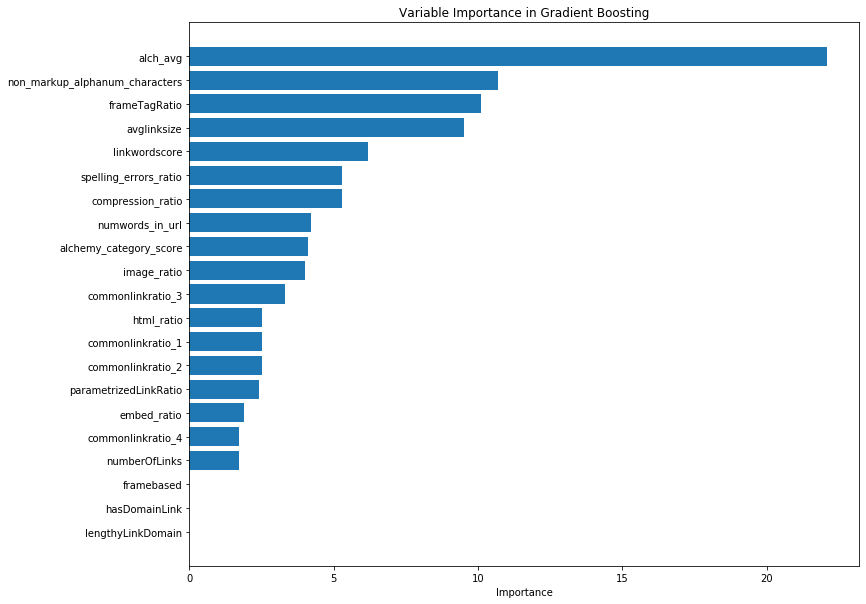

In [45]:
# bar graph to show feature importance
gbm_feat_imp = gbm_feat_imp.sort_values(by= ["imp"], ascending= True)
pos = np.arange(gbm_feat_imp.shape[0]) + 0.5
plt.figure(figsize=(12, 10))
plt.subplot(1, 1, 1)
plt.barh(pos, gbm_feat_imp.imp.values*100, align='center')
plt.yticks(pos, gbm_feat_imp.feat.values)
plt.xlabel("Importance")
plt.title("Variable Importance in Gradient Boosting")
plt.show()

<Figure size 432x288 with 0 Axes>

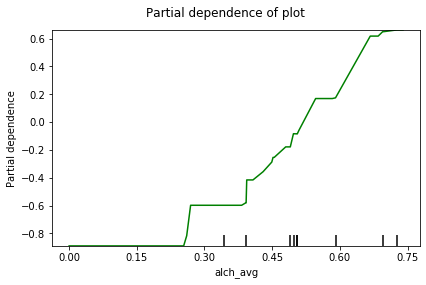

In [46]:
# Partial dependence plots
fig=plt.figure()
fig, axs = plot_partial_dependence(gbm1, train[feat], features= [20], 
                                   feature_names= feat, grid_resolution= 100) 
fig.suptitle('Partial dependence of plot')
plt.subplots_adjust(top=0.9)  # tight_layout causes overlap with suptitle
plt.show();

---

Text processing
=============

In [47]:
# ==========================================
# 5. Feature engineering
# ==========================================


# =============================
# 5.3.1 Text features
# =============================

# simple text mining -- count number of words in each document 
count_dtm = CountVectorizer(min_df= 10,  max_features= 100, strip_accents= 'unicode',
                            analyzer= "word", token_pattern= r"\w{1,}", ngram_range=(1, 2), 
                            binary= True)
count_dtm.fit(train["boilerplate"])

CountVectorizer(analyzer='word', binary=True, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=100, min_df=10,
                ngram_range=(1, 2), preprocessor=None, stop_words=None,
                strip_accents='unicode', token_pattern='\\w{1,}',
                tokenizer=None, vocabulary=None)

In [48]:
# create document term matrix
train_cnt_dtm = count_dtm.transform(train["boilerplate"])
val_cnt_dtm = count_dtm.transform(val["boilerplate"])
test_cnt_dtm = count_dtm.transform(test["boilerplate"])
print(train_cnt_dtm.shape); print(val_cnt_dtm.shape); print(test_cnt_dtm.shape)

(3697, 100)
(1849, 100)
(1849, 100)


---

#### Logistic Regression with Text Processing

In [1]:
# =============================
# 4.6 Logistic with 
#     text features
# =============================

# fit logistic regression
logReg3 = LogisticRegression(penalty = "l2", C = 1)
logReg3.fit(train_cnt_dtm, train["label"])

# predict on validation data
logReg3_val = pd.Series(logReg3.predict(val_cnt_dtm))
print(" -- -- -- ")

# auc score
print("Logistic with text features: " + str(np.round(roc_auc_score(val["label"], logReg3_val.values), 5)))

NameError: name 'LogisticRegression' is not defined

---

#### Text Features

In [50]:
# =============================
# 5.3.2 Text features
# =============================

# TFIDF
idf_dtm = TfidfVectorizer(min_df= 10,  max_features= None, strip_accents= "unicode",
                          analyzer= "word", token_pattern= r"\w{1,}", ngram_range=(1, 2), 
                          use_idf= 1, smooth_idf= 1, sublinear_tf= 1)
idf_dtm.fit(train["boilerplate"])
train_idf_dtm = idf_dtm.transform(train["boilerplate"])
val_idf_dtm = idf_dtm.transform(val["boilerplate"])
test_idf_dtm = idf_dtm.transform(test["boilerplate"])
print(train_idf_dtm.shape); print(val_idf_dtm.shape); print(test_idf_dtm.shape)

(3697, 24432)
(1849, 24432)
(1849, 24432)


---

In [51]:
# =============================
# 4.6 Logistic with 
#     text features
# =============================

# fit logistic regression
logReg4 = LogisticRegression(penalty = "l2", C = 1)
logReg4.fit(train_idf_dtm, train["label"])

# predict on validation data
logReg4_val = pd.Series(logReg4.predict(val_idf_dtm))
print(" -- -- -- ")

# auc score
print("Logistic with text features: " + str(np.round(roc_auc_score(val["label"], logReg4_val.values), 5)))

 -- -- -- 
Logistic with text features: 0.80246


---

Dimension reduction
===========

### Text feature selection using logistic regression

In [52]:
# =============================
# 5.4 Feature selection
# =============================

def textFeatureSelect(dtm, target, model, tf_object, nfolds= 4, nreps= 2):
    feat_imp = pd.DataFrame({"feat":[], "imp": []})
    for r in range(0, nreps):
        print("Run", r+1, "of", nreps)
        folds = createFolds(df= dtm, nfolds= nfolds)
        for f in range(0, nfolds):
            print("Fold", f+1, "of", nfolds)
            tr = np.where(folds.values != f)[0]
            va = np.where(folds.values == f)[0]
            model.fit(dtm[tr,:], target[tr])
            imp = pd.DataFrame({"feat": tf_object.get_feature_names(), "imp": model.coef_[0,:]})
            imp["imp"] = imp["imp"].abs()
            feat_imp = feat_imp.append(imp)

    feat_imp = feat_imp.groupby("feat")
    feat_imp = feat_imp.agg({"imp": np.mean})
    feat_imp = pd.DataFrame({"feat": feat_imp.index, "imp": feat_imp.imp})
    feat_imp = feat_imp.sort_values(by = ["imp"], ascending= False)
    
    return feat_imp

In [53]:
# Select best features from text data using logistic regression
model = LogisticRegression(penalty = "l2", C = 1)
imp_text_feat = textFeatureSelect(train_idf_dtm, target= train["label"].values, model= model, 
                                  tf_object= idf_dtm, nfolds= 4, nreps= 2)

Run 1 of 2
Fold 1 of 4
Fold 2 of 4
Fold 3 of 4
Fold 4 of 4
Run 2 of 2
Fold 1 of 4
Fold 2 of 4
Fold 3 of 4
Fold 4 of 4


In [54]:
# important text features
print(imp_text_feat.head(20))

# keep the top 1000 ones
text_feat = imp_text_feat.iloc[0:1000, :]
idf_dtm_words = pd.DataFrame({"feat": idf_dtm.get_feature_names()})
idf_dtm_words = pd.merge(idf_dtm_words, text_feat, on= "feat", how= "inner", left_index= False, right_index= True)

# subset dtm with important features only
train_idf_dtm_sub = train_idf_dtm[:, idf_dtm_words.index]
val_idf_dtm_sub = val_idf_dtm[:, idf_dtm_words.index]
test_idf_dtm_sub = test_idf_dtm[:, idf_dtm_words.index]
print(" --- ")
print(train_idf_dtm_sub.shape); print(val_idf_dtm_sub.shape); print(val_idf_dtm_sub.shape)

                  feat       imp
feat                            
recipe          recipe  2.876146
recipes        recipes  2.598850
news              news  1.978249
fashion        fashion  1.783520
food              food  1.454226
cheese          cheese  1.312853
make              make  1.311854
video            video  1.311620
chicken        chicken  1.307799
chocolate    chocolate  1.284137
1                    1  1.277455
butter          butter  1.261568
baking          baking  1.192999
cooking        cooking  1.174404
allrecipes  allrecipes  1.129374
cup                cup  1.122985
minutes        minutes  1.111052
until            until  1.103590
s                    s  1.096590
cook              cook  1.051645
 --- 
(3697, 1000)
(1849, 1000)
(1849, 1000)


---

In [55]:
# =============================
# 4.7 Logistic with important
#     text features
# =============================

# fit logistic regression
logReg5 = LogisticRegression(penalty = "l2", C = 1)
logReg5.fit(train_idf_dtm_sub, train["label"])

# predict on validation data
logReg5_val = pd.Series(logReg5.predict_proba(val_idf_dtm_sub)[:,1])
print(" -- -- -- ")

# auc score
print("Logistic with text features: " + str(np.round(roc_auc_score(val["label"], logReg5_val.values), 5)))

 -- -- -- 
Logistic with text features: 0.86599


----

# Class Exercise

### Build logistic regression model with different values of the penalty parameter. What do you find?

In [56]:
# =============================
# Class Exercise - varying penalty
# =============================

### Enter code here

---

Variance explained (first 10 components): 6.69


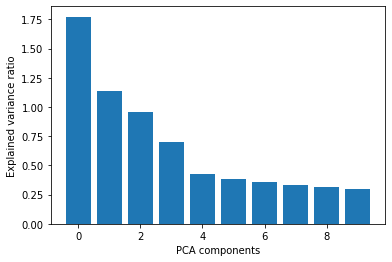

In [57]:
# =============================
# 5.5 Dimension reduction -- PCA
# =============================

# 5.5.1 Sample fit

# Sample fit with 10 components
rpca = PCA(n_components = 10, random_state = 8795, svd_solver = "randomized")
rpca.fit(train_idf_dtm.toarray())
print ('Variance explained (first %d components): %.2f'%(10, sum(rpca.explained_variance_ratio_)*100))

# plot
exp_var = list((rpca.explained_variance_ratio_)*100)
x = range(10)
plt.bar(x, exp_var)
plt.xlabel("PCA components")
plt.ylabel("Explained variance ratio")
plt.show()

In [58]:
# fit with 100 components
rpca = PCA(n_components = 100, random_state = 8795, svd_solver = "randomized")
rpca.fit(train_idf_dtm.toarray())

# tranform dtm
train_idf_dtm_pca = rpca.transform(train_idf_dtm.toarray())
val_idf_dtm_pca = rpca.transform(val_idf_dtm.toarray())
test_idf_dtm_pca = rpca.transform(test_idf_dtm.toarray())
print(" --- ")
print(train_idf_dtm_pca.shape); print(val_idf_dtm_pca.shape); print(test_idf_dtm_pca.shape)

 --- 
(3697, 100)
(1849, 100)
(1849, 100)


In [59]:
# =============================
# 5.5 Dimension reduction
# =============================

# 5.5.2 Optimizing number of components

def pca_optimization(n_comp, train, val, training_target, validation_target, 
                     model, evaluation, classify=True):
    output = pd.DataFrame(columns=['n_comp', 'score'])

    for r in range(0,len(n_comp)):
        rpca = PCA(n_components = n_comp[r], random_state = 8756, svd_solver = "randomized") 
        rpca.fit(train.toarray())
    
        # tranform dtm
        train_pca = rpca.transform(train.toarray())
        val_pca = rpca.transform(val.toarray())
        print(" --- ")
        print('explained variance (first %d components): %.2f'%(n_comp[r], sum(rpca.explained_variance_ratio_)))

        if classify:   
            model.fit(train_pca, training_target)
            model_val = pd.Series(model.predict_proba(val_pca)[:,1])
        else:
            model.fit(train_pca, training_target)
            model_val = pd.Series(model.predict(val_pca))
        score = np.round(evaluation(validation_target, model_val.values), 5)
        data= {"id": n_comp[r],"score": score}
        output = output.append(pd.Series([n_comp[r], score], index=['n_comp','score']), ignore_index=True)
        
    return output

In [60]:
# optimal number of pca components
model = LogisticRegression(penalty = "l2", C = 1)
pca_optimization(n_comp= [50, 100, 200], train= train_idf_dtm, val= val_idf_dtm, 
                 training_target= train["label"], validation_target= val["label"], model= model, 
                 evaluation= roc_auc_score, classify= True)


 --- 
explained variance (first 50 components): 0.13
 --- 
explained variance (first 100 components): 0.18
 --- 
explained variance (first 200 components): 0.25


,n_comp,score
0,50.0,0.86715
1,100.0,0.86917
2,200.0,0.86878


---

In [61]:
# =============================
# 4.7 Logistic with PCA
# =============================

# fit logistic regression
logReg6 = LogisticRegression(penalty = "l2", C = 1)
logReg6.fit(train_idf_dtm_pca, train["label"])

# predict on validation data
logReg6_val = pd.Series(logReg6.predict_proba(val_idf_dtm_pca)[:,1])
print(" -- -- -- ")

# auc score
print("Logistic with text features: " + str(np.round(roc_auc_score(val["label"], logReg6_val.values), 5)))

 -- -- -- 
Logistic with text features: 0.86865


In [62]:
# =============================
# 4.8 Gradient Boosting with PCA
# =============================

# simple gbm
gbm2 = GradientBoostingClassifier(loss = "deviance", learning_rate= 0.1, n_estimators= 100,
                                 max_depth= 2, min_samples_split= 10, min_samples_leaf= 10,
                                 subsample= 0.5, max_features= None, verbose= 0)
gbm2.fit(train_idf_dtm_pca, train["label"])

# predict on validation data
gbm2_val = pd.Series(gbm2.predict_proba(val_idf_dtm_pca)[:,1])
print(" -- -- -- ")

# auc score
print("GBM: " + str(np.round(roc_auc_score(val["label"], gbm2_val.values), 5)))

 -- -- -- 
GBM: 0.86781


-----

## Quick Ensemble

In [63]:
# simple blend of logistic and GBM
simple_avg_val = np.mean([logReg5_val.values, gbm2_val.values], axis= 0)
print("Simple Avg:" + str(roc_auc_score(val["label"], simple_avg_val)))

Simple Avg:0.8700866311436857


-----

## Random Forests

In [64]:
# =============================
# 4.9 Random Forest with PCA
#     and meta features
# =============================

# join meta features with pca features
feat = ["avglinksize", "commonlinkratio_1", "commonlinkratio_2", "commonlinkratio_3", "commonlinkratio_4", 
        "compression_ratio", "embed_ratio", "framebased", "frameTagRatio", "hasDomainLink", "html_ratio",
        "image_ratio", "lengthyLinkDomain", "linkwordscore", "non_markup_alphanum_characters", "numberOfLinks", 
        "numwords_in_url", "parametrizedLinkRatio","spelling_errors_ratio", "alchemy_category_score", 
        "alch_avg"]
train_combine = train[feat].join(pd.DataFrame(train_idf_dtm_pca, index= train.index))
val_combine = val[feat].join(pd.DataFrame(val_idf_dtm_pca, index= val.index))
test_combine = test[feat].join(pd.DataFrame(test_idf_dtm_pca, index= test.index))

# random forests
rf1 = RandomForestClassifier(n_estimators= 100, random_state= 9876, verbose= 1)
rf1.fit(train_combine, train["label"])

# predict on validation data
rf1_val = pd.Series(rf1.predict_proba(val_combine)[:,1])
print(" -- -- -- ")

# auc score
print("RF: " + str(np.round(roc_auc_score(val["label"], rf1_val.values), 5)))

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


 -- -- -- 
RF: 0.86784


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    3.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.1s finished


In [65]:
# simple blend of logistic, GBM, and RF
simple_avg_val = np.mean([logReg5_val.values, gbm2_val.values, rf1_val.values], axis= 0)
print("Simple Avg:" + str(roc_auc_score(val["label"], simple_avg_val)))

Simple Avg:0.8719891465358074


-----

## SGD

In [66]:
# =============================
# 4.10 SGD on entire dtm
# =============================

# train sgd
sgd1 = SGDClassifier(loss = "log", penalty = "l2",
                     max_iter = 30, random_state = 34)
sgd1.fit(train_idf_dtm, train["label"])

# predict on validation data
sgd1_val = pd.Series(sgd1.predict_proba(val_idf_dtm)[:,1])
print(" -- -- -- ")

# auc score
print("SGD: " + str(np.round(roc_auc_score(val["label"], sgd1_val.values), 5)))

 -- -- -- 
SGD: 0.8605


In [67]:
# simple blend of logistic, GBM, RF, SGD
simple_avg_val = np.mean([logReg5_val.values, gbm2_val.values, rf1_val.values, sgd1_val.values], axis= 0)
print("Simple Avg:" + str(roc_auc_score(val["label"], simple_avg_val)))

Simple Avg:0.8710706504824152


---

# Cross Validation

In [68]:
# ==========================================
# 6. Cross-validation
# ==========================================


# =============================
# 6.1 CV function - 1 
# =============================

#import warnings
#warnings.filterwarnings("ignore", category=DeprecationWarning) 

def cross_val_model(train, target, model, nfolds= 4, classify= True):
        folds = KFold(n_splits = nfolds, shuffle= True, random_state = np.random.randint(1e4))
        if classify:
            preds = [np.array([model.fit(train[train_indices], 
                                         target[train_indices]).predict_proba(train[test_indices])[:,1], 
                               target[test_indices], test_indices])
                     for train_indices, test_indices in folds.split(train)]
        else:
            preds = [np.array([model.fit(train[train_indices], target[train_indices]).predict(train[test_indices]), 
                               target[test_indices], test_indices])
                     for train_indices, test_indices in folds.split(train)]
        
        preds = [preds[x].transpose() for x in range(len(preds))]
        preds = np.concatenate(preds, axis= 0)
        preds = pd.DataFrame(preds, columns= ["pred", "target", "index"])
        
        return preds

    
# serial version
# nreps = 4
# preds = [cross_val_model(tr_dtm, target, model= model, nfolds= 10, classify= True) for r in range(nreps)]

def cross_val_model_nrep(train, target, model, nfolds, nreps= 4, classify= True,
                         num_cores= 2, parallel= False, verbose= 0):
    if parallel:
        preds = Parallel(n_jobs= num_cores, 
                         verbose= verbose)(delayed(cross_val_model)(train, 
                                                                    target, model, nfolds= 10,
                                                                    classify= True) for r in range(nreps))
    else:
        preds = [cross_val_model(train, target, model= model, nfolds= 10, classify= True) for r in range(nreps)]
    preds = pd.DataFrame(np.concatenate(preds, axis= 0), columns= ["pred", "target", "index"])
    preds = preds.groupby(["index", "target"]).agg({"pred": np.mean})
    preds = preds.reset_index().sort_values(by= ["index"])
    return preds

In [69]:
# =============================
# 6.2 Logistic CV
# =============================

logReg7_cv = LogisticRegression(penalty = "l2", C = 1)

# cv
logReg7_train = cross_val_model_nrep(train= train_idf_dtm, target= train.label.values, model= logReg7_cv, 
                                     nfolds= 10, nreps= 4, classify= True, num_cores= 4, parallel= True,
                                     verbose= 5)

# fit on entire training data to check on validation data
logReg7_val= pd.Series(logReg7_cv.fit(train_idf_dtm, train.label.values).predict_proba(val_idf_dtm)[:,1])
print(" -- -- -- ")

# auc score
print("Logistic cv score:" + str(np.round(roc_auc_score(train["label"], logReg7_train.pred.values), 5)))
print("Logistic val score:"  + str(np.round(roc_auc_score(val["label"], logReg7_val.values), 5)))

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   2 out of   4 | elapsed:   10.5s remaining:   10.5s
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:   11.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:   11.0s finished


 -- -- -- 
Logistic cv score:0.87577
Logistic val score:0.86512


In [70]:
# =============================
# 6.3 CV function - 2
# =============================

def cvModel(train, test, target, feat, model, idcol, nfolds= 2, nreps= 2, classify= True):
    ''' Train a model using k-fold cross validation
        and return cross-validated predictions on 
        training and test data sets
    '''
    val_pred = pd.DataFrame({idcol: [], 
                             'target': [],
                            'repeat':[], 
                            'fold': [], 
                            'pred': []})
    test_pred = pd.DataFrame(test[idcol])
    
    for r in range(0, nreps):
        folds = createFolds(train, nfolds)
        print("Run", r+1, "of", nreps)
        for f in range(0, nfolds):
            print("Fold", f+1, "of", nfolds)
            tr = folds.values != f
            va = folds.values == f
            model.fit(train.ix[tr, feat], target[tr])
            scored = pd.DataFrame({idcol: train.ix[va, idcol], 'target': target[va],
                                   'repeat': r, 'fold': f})
            tmp = 'pred' + str(r) + str(f)                    
            if classify:
                scored["pred"] = model.predict_proba(train.ix[va, feat])[:,1]
                test_pred[tmp] = model.predict_proba(test[feat])[:,1]
            else:
                scored["pred"] = model.predict(train.ix[va, feat])
                test_pred[tmp] = model.predict(test[feat])
            val_pred = val_pred.append(scored)
            
    val_pred = val_pred.groupby(idcol)
    val_pred = val_pred.agg({'target': np.mean,
                             'pred': np.mean})
    val_pred = val_pred.reset_index()
    val_pred = val_pred.sort_values(by= idcol)
    test_pred["pred"] = test_pred.ix[:,1:(test_pred.shape[1]+1)].mean(axis= 1)
    test_pred = test_pred[[idcol, "pred"]]
    
    return val_pred, test_pred



In [71]:
# merge pca components with main
train_idf_dtm_pca = pd.DataFrame(train_idf_dtm_pca)
val_idf_dtm_pca = pd.DataFrame(val_idf_dtm_pca)
test_idf_dtm_pca = pd.DataFrame(test_idf_dtm_pca)

# give string names to columns
train_idf_dtm_pca.columns = ["pca" + str(i) for i in train_idf_dtm_pca.columns]
val_idf_dtm_pca.columns = ["pca" + str(i) for i in val_idf_dtm_pca.columns]
test_idf_dtm_pca.columns = ["pca" + str(i) for i in test_idf_dtm_pca.columns]

# generate index to merge on
train_idf_dtm_pca.index = train.index
val_idf_dtm_pca.index = val.index
test_idf_dtm_pca.index = test.index

# join
train_pca = train.join(train_idf_dtm_pca)
val_pca = val.join(val_idf_dtm_pca)
test_pca = test.join(test_idf_dtm_pca)
print(train_pca.shape); print(val_pca.shape); print(test_pca.shape);

(3697, 142)
(1849, 141)
(1849, 142)


In [72]:
# =============================
# 6.4 Cross-val gbm
# =============================

# features to use
feat = list(train_idf_dtm_pca.columns.values)

# cv-gbm
gbm4 = GradientBoostingClassifier(loss = "deviance", n_estimators= 100,
                                  max_depth= 2, min_samples_split= 10, min_samples_leaf= 10,
                                  subsample= 0.75, max_features= None, verbose= 0)
gbm4_train, gbm4_val = cvModel(train_pca, val_pca, target= train_pca["label"], model= gbm4, feat= feat, 
                               idcol= "urlid", nfolds= 4, nreps= 2, classify= True)

print(" -- -- -- ")

# auc score
print("GBM cv score:" + str(np.round(roc_auc_score(gbm4_train.target.values, gbm4_train.pred.values), 5)))
print("GBM val score:" + str(np.round(roc_auc_score(val_pca["label"], gbm4_val.pred.values), 5)))

Run 1 of 2
Fold 1 of 4
Fold 2 of 4
Fold 3 of 4
Fold 4 of 4
Run 2 of 2
Fold 1 of 4
Fold 2 of 4
Fold 3 of 4
Fold 4 of 4
 -- -- -- 
GBM cv score:0.86848
GBM val score:0.86719


In [73]:
# =============================
# 6.5 Cross-val RF
# =============================

# meta features with pca features
feat = ["avglinksize", "commonlinkratio_1", "commonlinkratio_2", "commonlinkratio_3", "commonlinkratio_4", 
        "compression_ratio", "embed_ratio", "framebased", "frameTagRatio", "hasDomainLink", "html_ratio",
        "image_ratio", "lengthyLinkDomain", "linkwordscore", "non_markup_alphanum_characters", "numberOfLinks", 
        "numwords_in_url", "parametrizedLinkRatio","spelling_errors_ratio", "alchemy_category_score", 
        "alch_avg"]
feat.extend(list(train_idf_dtm_pca.columns.values))

# cv-rf
rf2 = RandomForestClassifier(n_estimators= 100, min_samples_split= 5, random_state= 9876,
                             max_features= 15, verbose= 0)
rf2_train, rf2_val = cvModel(train_pca, val_pca, target= train_pca["label"], model= rf2, feat= feat, 
                               idcol= "urlid", nfolds= 4, nreps= 2, classify= True)

print(" -- -- -- ")

# auc score
print("RF cv score: " + str(np.round(roc_auc_score(rf2_train.target.values, rf2_train.pred.values), 5)))
print("RF val score: " + str(np.round(roc_auc_score(val_pca["label"], rf2_val.pred.values), 5)))

Run 1 of 2
Fold 1 of 4
Fold 2 of 4
Fold 3 of 4
Fold 4 of 4
Run 2 of 2
Fold 1 of 4
Fold 2 of 4
Fold 3 of 4
Fold 4 of 4
 -- -- -- 
RF cv score: 0.86995
RF val score: 0.86885


In [74]:
# =============================
# 6.6 Cross-val ERT
# =============================


ert1_cv = ExtraTreesClassifier(n_estimators= 25, min_samples_split= 10, random_state= 134,
                               max_features= 55, min_samples_leaf= 5, verbose= 0)

ert1_train = cross_val_model_nrep(train= train_idf_dtm_sub, target= train.label.values, model= ert1_cv, 
                                     nfolds= 3, nreps= 8, classify= True, num_cores= 4, parallel= True,
                                     verbose= 5)

# fit on entire training data to check on validation data
print(" Fitting on entire training data ")
ert1_val= pd.Series(ert1_cv.fit(train_idf_dtm_sub, train.label.values).predict_proba(val_idf_dtm_sub)[:,1])
print(" -- -- -- ")

# auc score
print("ERT cv score: " + str(np.round(roc_auc_score(train["label"], ert1_train.pred.values), 5)))
print("ERT val score: "  + str(np.round(roc_auc_score(val["label"], ert1_val.values), 5)))

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   3 out of   8 | elapsed:   10.9s remaining:   18.1s
[Parallel(n_jobs=4)]: Done   5 out of   8 | elapsed:   20.1s remaining:   12.1s
[Parallel(n_jobs=4)]: Done   8 out of   8 | elapsed:   20.2s finished


 Fitting on entire training data 
 -- -- -- 
ERT cv score: 0.8805
ERT val score: 0.86062


---

Ensemble learning
========================

In [75]:
# ==========================================
# 7. Ensemble
# ==========================================


# =============================
# 7.1 Ensemble DF
# =============================

# order prediction data sets
train["sort_col"] = range(0, train.shape[0])
gbm4_train = pd.merge(gbm4_train, train[["urlid", "sort_col"]], on= "urlid", how= 'left').sort_values(by= ["sort_col"])
rf2_train = pd.merge(rf2_train, train[["urlid", "sort_col"]], on= "urlid", how= 'left').sort_values(by= ["sort_col"])

In [76]:
# create data frame containing all predictions
train_ens = pd.DataFrame({"urlid": gbm4_train.urlid.values, "label": gbm4_train.target.values, 
                          "logReg7": logReg7_train.pred.values,
                          "gbm4": gbm4_train.pred.values, "rf2": rf2_train.pred.values,
                         "ert1": ert1_train.pred.values})
val_ens = pd.DataFrame({"urlid": gbm4_val.urlid.values, "gbm4": gbm4_val.pred.values,
                        "logReg7": logReg7_val.values, "rf2": rf2_val.pred.values,
                       "ert1": ert1_val.values})
val_ens = pd.merge(val_ens, val[["urlid", "label"]], on= "urlid")

print(train_ens.columns.values); print(val_ens.columns.values)

['ert1' 'gbm4' 'label' 'logReg7' 'rf2' 'urlid']
['ert1' 'gbm4' 'logReg7' 'rf2' 'urlid' 'label']


In [77]:
# =============================
# 7.2 Simple average
# =============================

# simple average
simple_avg_train = np.mean([train_ens.gbm4.values, train_ens.rf2.values, train_ens.logReg7.values,
                           train_ens.ert1.values], axis= 0)
print("Simple avg cv: " + str(np.round(roc_auc_score(train_ens["label"], simple_avg_train), 5)))

simple_avg_val = np.mean([val_ens.gbm4.values, val_ens.rf2.values, val_ens.logReg7.values,
                         val_ens.ert1.values], axis= 0)
print("Simple avg val: " + str(np.round(roc_auc_score(val_ens["label"], simple_avg_val), 5)))

Simple avg cv: 0.87969
Simple avg val: 0.87108


In [78]:
# =============================
# 7.3 Weighted average
# Proportional representation vs. egalitarian democracy
# =============================

# weighted average
weight_avg_train = 0.8*train_ens.gbm4.values + 1.4*train_ens.logReg7.values
print("Weighted avg cv: " + str(np.round(roc_auc_score(train_ens["label"], weight_avg_train), 5)))

weight_avg_val = 0.8*val_ens.gbm4.values + 1.4*val_ens.logReg7.values
print("Weighted avg val: " + str(np.round(roc_auc_score(val_ens["label"], weight_avg_val), 5)))

Weighted avg cv: 0.87617
Weighted avg val: 0.86831


In [79]:
# =============================
# 7.4 Rank average
# =============================

# rank urlids by each prediction vector and then average
def get_ranked_preds(df, feat):
    for f in feat:
        df = df.sort_values(by = [f], ascending= True)
        df[f + "_rank"] = range(1, df.shape[0] + 1)
    return(df)

train_ens_rank = get_ranked_preds(train_ens, ["gbm4", "logReg7", "rf2", "ert1"])
val_ens_rank = get_ranked_preds(val_ens, ["gbm4", "logReg7", "rf2", "ert1"])

# simple average
rank_avg_train = np.mean([train_ens_rank.gbm4_rank.values, train_ens_rank.rf2_rank.values, 
                            train_ens_rank.logReg7_rank.values], axis= 0)
print("Rank avg cv: " + str(np.round(roc_auc_score(train_ens_rank["label"], rank_avg_train), 5)))


rank_avg_val = np.mean([val_ens_rank.gbm4_rank.values, val_ens_rank.rf2_rank.values, 
                            val_ens_rank.logReg7_rank.values], axis= 0)
print("Rank avg val: " + str(np.round(roc_auc_score(val_ens_rank["label"], rank_avg_val), 5)))

Rank avg cv: 0.87653
Rank avg val: 0.87086


In [80]:
# =============================
# 7.5 Stacked generalization
# =============================

# convert probabilities to logits
train_ens.describe()
feat = ["gbm4", "logReg7", "rf2", "ert1"]

train_ens[feat] = train_ens[feat].clip(0.01, 0.99)
val_ens[feat] = val_ens[feat].clip(0.01, 0.99)

train_ens[feat] = train_ens[feat].apply(st.logistic.ppf)
val_ens[feat] = val_ens[feat].apply(st.logistic.ppf)

print(" --- ")
print(train_ens.head())
print(val_ens.head())

 --- 
       ert1      gbm4  label   logReg7       rf2    urlid
0 -1.177639 -1.881652    0.0 -1.820647 -1.835509   8065.0
1  0.225723  0.926770    0.0  0.037044  0.759139   9682.0
2 -0.864059 -0.710574    0.0 -0.463699 -0.650852   6219.0
3 -1.162181 -1.449012    1.0 -0.721405 -1.056638   8312.0
4 -1.252145 -1.724036    0.0 -1.169940 -1.112203  10299.0
       ert1      gbm4   logReg7       rf2  urlid  label
0 -1.919044 -1.842144 -1.342612 -2.731036   3612      0
1 -1.367979 -1.135458 -0.749207 -0.774108   2771      0
2 -2.047119 -2.149053 -1.644974 -2.711849   1272      0
3 -1.595168 -1.222006 -1.336413 -1.142592   3178      1
4  3.038552  2.508206  2.971262  2.350453   1474      1


In [81]:
# Correlation matrix of predictions
feat = ["gbm4", "logReg7", "rf2", "ert1"]
train_ens[feat].corr()

,gbm4,logReg7,rf2,ert1
gbm4,1.000000,0.944085,0.943121,0.938304
logReg7,0.944085,1.000000,0.923919,0.965189
rf2,0.943121,0.923919,1.000000,0.932512
ert1,0.938304,0.965189,0.932512,1.000000


In [82]:
# Individual model scores
print("Logistic: " + str(np.round(roc_auc_score(val_ens["label"], val_ens["logReg7"]), 5)))
print("GBM: "  + str(np.round(roc_auc_score(val_ens["label"], val_ens["gbm4"]), 5)))
print("RF: "  + str(np.round(roc_auc_score(val_ens["label"], val_ens["rf2"]), 5)))
print("ERT: "  + str(np.round(roc_auc_score(val_ens["label"], val_ens["ert1"]), 5)))

Logistic: 0.86512
GBM: 0.86719
RF: 0.86885
ERT: 0.86062


In [83]:
# build cv logistic
logReg8_ens = LogisticRegression()
feat = ["gbm4", "logReg7", "rf2", "ert1"]
logReg8_ens_cv, logReg8_ens_val = cvModel(train_ens, val_ens, target= train_ens["label"], model= logReg8_ens, 
                                          feat= feat, idcol= "urlid", nfolds= 4, nreps= 4, classify= True)

# auc score
print(" --- ")
print("Ensemble cv score: " + str(np.round(roc_auc_score(logReg8_ens_cv.target.values, logReg8_ens_cv.pred.values), 5)))
print("Ensemble val score: " + str(np.round(roc_auc_score(val_ens["label"], logReg8_ens_val.pred.values), 5)))

Run 1 of 4
Fold 1 of 4
Fold 2 of 4
Fold 3 of 4
Fold 4 of 4
Run 2 of 4
Fold 1 of 4
Fold 2 of 4
Fold 3 of 4
Fold 4 of 4
Run 3 of 4
Fold 1 of 4
Fold 2 of 4
Fold 3 of 4
Fold 4 of 4
Run 4 of 4
Fold 1 of 4
Fold 2 of 4
Fold 3 of 4
Fold 4 of 4
 --- 
Ensemble cv score: 0.88134
Ensemble val score: 0.86973


------

# Lesson summary

### What we've learned:
1. Process data with pandas
2. Visualize variables from dataframe
3. Cross-tabulations
4. Missing value imputation
5. Manual feature engineering using categorical averages
5. Automated feature engineering using PCA
6. Text processing
7. Dealing with HD data
8. Cross-validation
9. Classification models
10. Ensemble learning

----